In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# Load the dataset
data = pd.read_csv("Downloads/lung_cancer_mortality_data_large_v2.csv")

# Check the first 5 rows
print(data.head())

# Basic info about the dataset
print(data.info())

# Summary statistics
print(data.describe())

   id   age  gender         country diagnosis_date cancer_stage  \
0   1  64.0  Female         Germany     2016-04-07    Stage III   
1   2  50.0    Male  Czech Republic     2023-04-22    Stage III   
2   3  65.0    Male         Romania     2023-04-07     Stage IV   
3   4  51.0  Female          Latvia     2016-02-07    Stage III   
4   5  37.0    Male          Greece     2023-12-01      Stage I   

  beginning_of_treatment_date family_history  smoking_status   bmi  \
0                  2016-04-21             No    Never Smoked  31.1   
1                  2023-05-02            Yes  Passive Smoker  25.9   
2                  2023-04-12             No    Never Smoked  18.9   
3                  2016-02-13            Yes   Former Smoker  34.6   
4                  2023-12-03            Yes    Never Smoked  40.2   

   cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  \
0                257             1       1          0             0   
1                208             1

In [11]:
# Check for missing values
print(data.isnull().sum())

# Drop or fill missing values as necessary
data.dropna(subset=['bmi', 'cholesterol_level'], inplace=True)
data.fillna({'cancer_stage': 'Unknown'}, inplace=True)

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64


In [12]:
# Encode categorical features
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])  # Male=1, Female=0
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])
data['family_history'] = label_encoder.fit_transform(data['family_history'])
data['survived'] = label_encoder.fit_transform(data['survived'])

In [13]:
data.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'beginning_of_treatment_date', 'family_history', 'smoking_status',
       'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis',
       'other_cancer', 'treatment_type', 'end_treatment_date', 'survived'],
      dtype='object')

In [14]:
# Scale numerical features
scaler = StandardScaler()
data[['age', 'bmi', 'cholesterol_level']] = scaler.fit_transform(data[['age', 'bmi', 'cholesterol_level']])

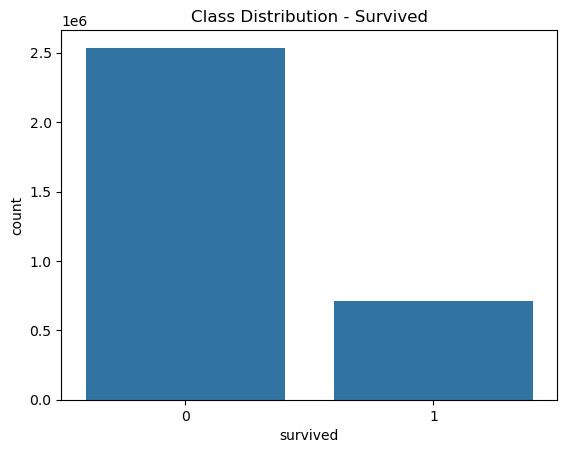

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Visualize the class distribution for 'survived'
sns.countplot(x='survived', data=data)
plt.title("Class Distribution - Survived")
plt.show()

# Ensure 'age' and 'survived' are numeric for the box plot
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['survived'] = pd.to_numeric(data['survived'], errors='coerce')

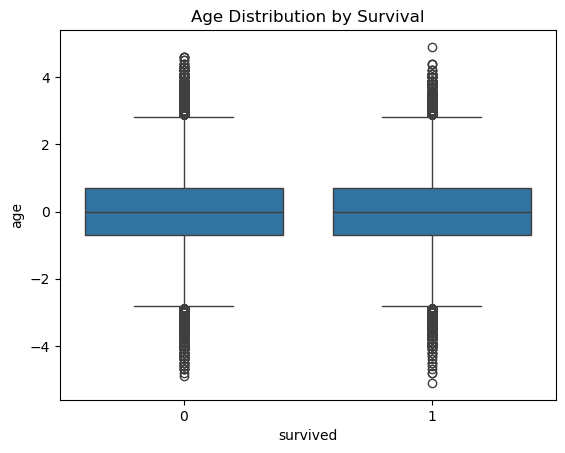

In [16]:
# Box plot for age vs. survived
sns.boxplot(x='survived', y='age', data=data)
plt.title("Age Distribution by Survival")
plt.show()

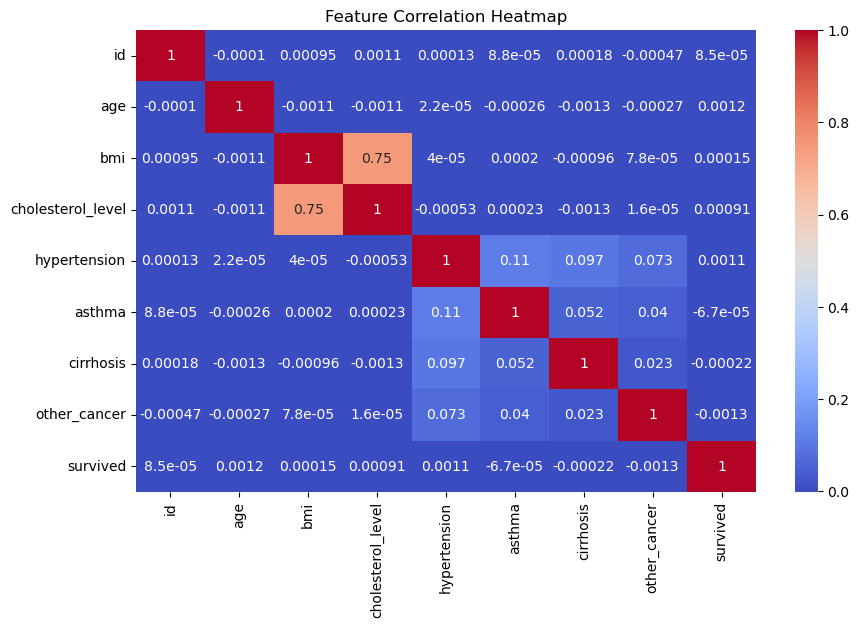

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
# Define features and target
X = data.drop(['id', 'survived', 'diagnosis_date', 'beginning_of_treatment_date', 'end_treatment_date'], axis=1)
y = data['survived']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from scipy.sparse import hstack

# Define features and target
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

X_numeric = data[numerical_cols]
y = data['survived']

# One-hot encode categorical columns using sparse matrices
encoder = OneHotEncoder(sparse_output=True, drop='first', handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(data[categorical_cols])

# Concatenate numeric and encoded categorical features
X = hstack([X_numeric.values, encoded_categorical])

# Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
X = selector.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    507220
           1       1.00      1.00      1.00    142780

    accuracy                           1.00    650000
   macro avg       1.00      1.00      1.00    650000
weighted avg       1.00      1.00      1.00    650000



In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [7]:
from sklearn.svm import SVC

In [8]:
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluation
print("SVM Report:")
print(classification_report(y_test, y_pred_svm))

SVM Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        93
           1       0.90      0.80      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



In [9]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

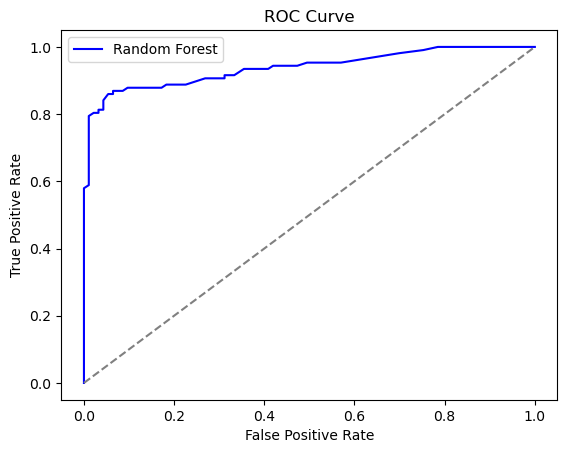

In [10]:
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

plt.plot(fpr, tpr, color='blue', label='Random Forest')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### 1. Smoking Status and Survival Rate

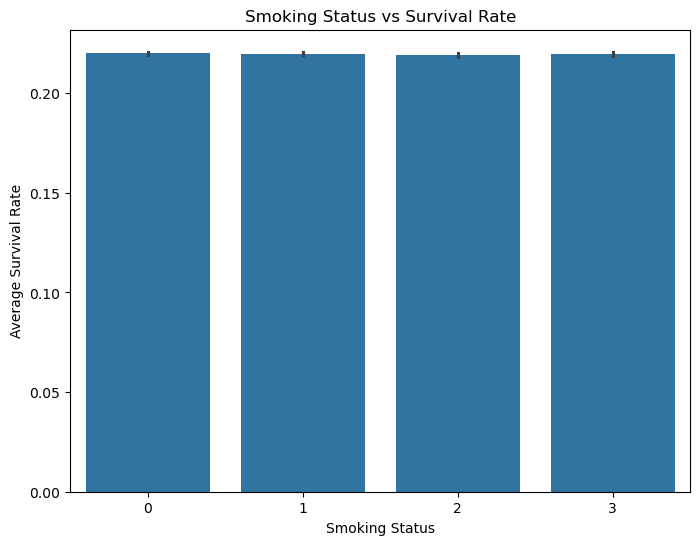

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into a DataFrame called 'data'
# 1. Smoking Status vs Survival Rate
plt.figure(figsize=(8, 6))  # Set figure size for the plot
sns.barplot(x='smoking_status', y='survived', data=data)
plt.title('Smoking Status vs Survival Rate')
plt.xlabel('Smoking Status')  # Label for the x-axis
plt.ylabel('Average Survival Rate')  # Label for the y-axis
plt.show()


### 2. Cancer Stage and Survival Rate

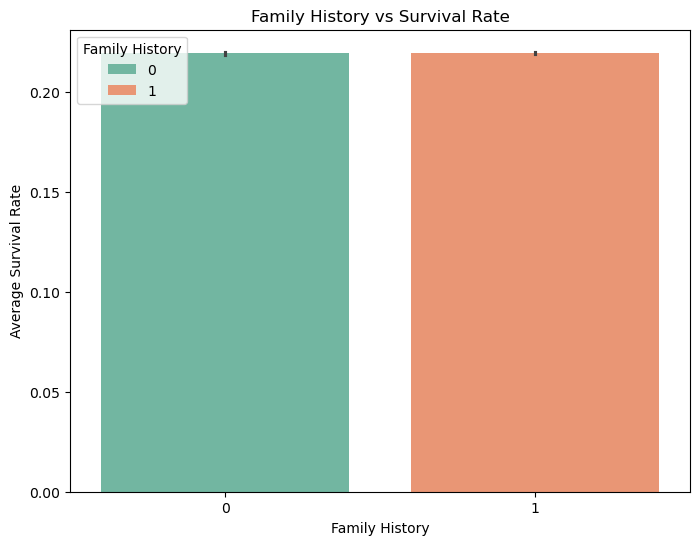

In [34]:
plt.figure(figsize=(8, 6))  # Set figure size for the plot

# Now assigning 'family_history' to 'hue' to avoid the warning
sns.barplot(x='family_history', y='survived', data=data, hue='family_history', palette='Set2')

# Customizing the plot with labels and title
plt.title('Family History vs Survival Rate')
plt.xlabel('Family History')  # Label for the x-axis
plt.ylabel('Average Survival Rate')  # Label for the y-axis
plt.legend(title='Family History', loc='upper left')  # Customizing the legend
plt.show()

### 3. BMI and Survival Rate

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


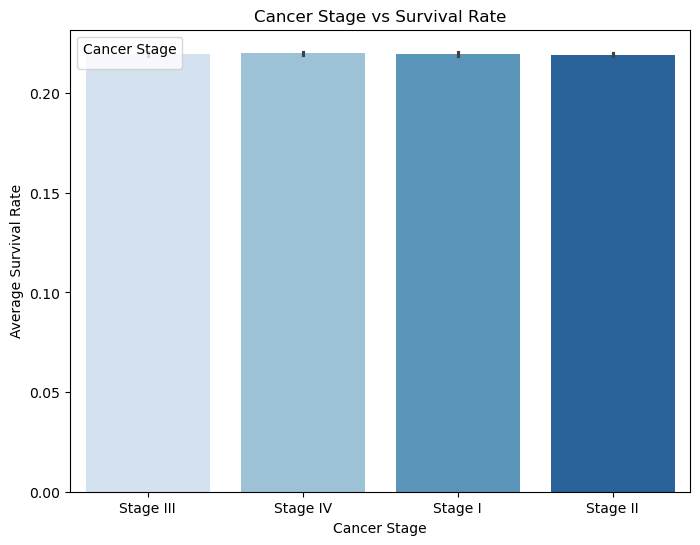

In [36]:
plt.figure(figsize=(8, 6))  # Set figure size for the plot

# Now assigning 'cancer_stage' to 'hue' to avoid the warning
sns.barplot(x='cancer_stage', y='survived', data=data, hue='cancer_stage', palette='Blues')

# Customizing the plot with labels and title
plt.title('Cancer Stage vs Survival Rate')
plt.xlabel('Cancer Stage')  # Label for the x-axis
plt.ylabel('Average Survival Rate')  # Label for the y-axis
plt.legend(title='Cancer Stage', loc='upper left')  # Customizing the legend
plt.show()

### 4. Family History and Survival Rate

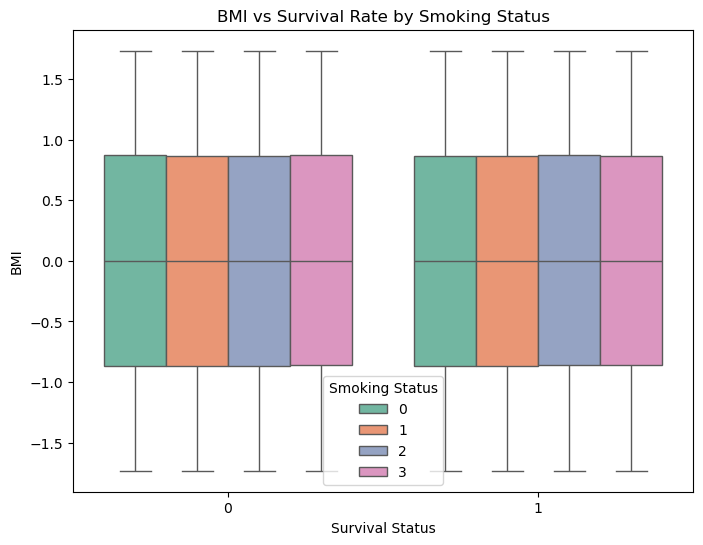

In [38]:
plt.figure(figsize=(8, 6))  # Set figure size for the plot

# Using a boxplot to visualize the distribution of BMI for different survival statuses
# Apply color palette based on 'smoking_status'
sns.boxplot(x='survived', y='bmi', data=data, hue='smoking_status', palette='Set2')

# Customizing the plot with labels and title
plt.title('BMI vs Survival Rate by Smoking Status')
plt.xlabel('Survival Status')  # Label for the x-axis
plt.ylabel('BMI')  # Label for the y-axis
plt.legend(title='Smoking Status')  # Customizing the legend
plt.show()

### 5.Treatment Type and Survival Rate

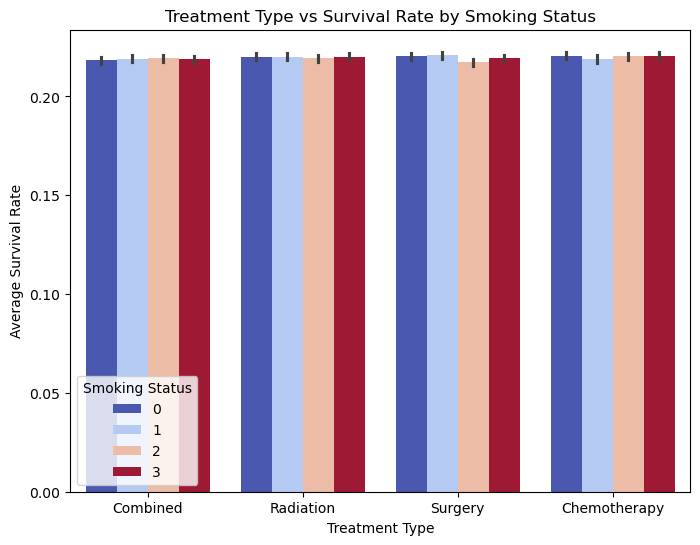

In [41]:
plt.figure(figsize=(8, 6))  # Set figure size for the plot

# Using a barplot to visualize the average survival rate for each treatment type
# Apply color palette based on 'smoking_status' or any other relevant categorical variable
sns.barplot(x='treatment_type', y='survived', data=data, hue='smoking_status', palette='coolwarm')

# Customizing the plot with labels and title
plt.title('Treatment Type vs Survival Rate by Smoking Status')
plt.xlabel('Treatment Type')  # Label for the x-axis
plt.ylabel('Average Survival Rate')  # Label for the y-axis
plt.legend(title='Smoking Status')  # Customizing the legend
plt.show()